<a href="https://colab.research.google.com/github/toruuno/report_ml/blob/master/skl_nonlinear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Googleドライブのマウント

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [25]:
#seaborn設定
sns.set()
#背景変更
sns.set_style("darkgrid", {'grid.linestyle': '--'})
#大きさ(スケール変更)
sns.set_context("paper")

In [26]:
n=100

def true_func(x):
    z = 1-48*x+218*x**2-315*x**3+145*x**4
    return z 

def linear_func(x):
    z = x
    return z 

No handles with labels found to put in legend.


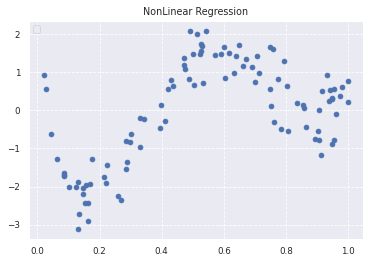

In [27]:
# 真の関数からノイズを伴うデータを生成

# 真の関数からデータ生成
data = np.random.rand(n).astype(np.float32)
data = np.sort(data)
target = true_func(data)

# 　ノイズを加える
noise = 0.5 * np.random.randn(n) 
target = target  + noise

# ノイズ付きデータを描画

plt.scatter(data, target)

plt.title('NonLinear Regression')
plt.legend(loc=2)

0.2755338898834395


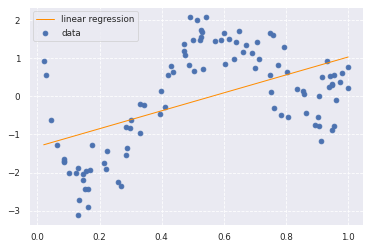

In [28]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression()
data = data.reshape(-1,1)
target = target.reshape(-1,1)
clf.fit(data, target)

p_lin = clf.predict(data)

plt.scatter(data, target, label='data')
plt.plot(data, p_lin, color='darkorange', marker='', linestyle='-', linewidth=1, markersize=6, label='linear regression')
plt.legend()
print(clf.score(data, target))

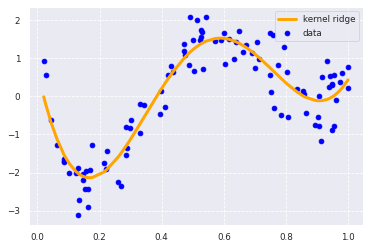

In [29]:
from sklearn.kernel_ridge import KernelRidge

clf = KernelRidge(alpha=0.0002, kernel='rbf')
clf.fit(data, target)

p_kridge = clf.predict(data)

plt.scatter(data, target, color='blue', label='data')

plt.plot(data, p_kridge, color='orange', linestyle='-', linewidth=3, markersize=6, label='kernel ridge')
plt.legend()
#plt.plot(data, p, color='orange', marker='o', linestyle='-', linewidth=1, markersize=6)

0.8668182731936125


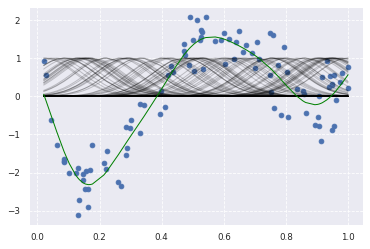

In [30]:
#Ridge

from sklearn.metrics.pairwise import rbf_kernel
from sklearn.linear_model import Ridge

kx = rbf_kernel(X=data, Y=data, gamma=50)
#KX = rbf_kernel(X, x)

#clf = LinearRegression()
clf = Ridge(alpha=1)    #alphaが大きすぎる様なので少し調整しておく
clf.fit(kx, target)

p_ridge = clf.predict(kx)

plt.scatter(data, target,label='data')
for i in range(len(kx)):
    plt.plot(data, kx[i], color='black', linestyle='-', linewidth=1, markersize=3, label='rbf', alpha=0.2)

#plt.plot(data, p, color='green', marker='o', linestyle='-', linewidth=0.1, markersize=3)
plt.plot(data, p_ridge, color='green', linestyle='-', linewidth=1, markersize=3,label='ridge regression')
#plt.legend()

print(clf.score(kx, target))

In [31]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

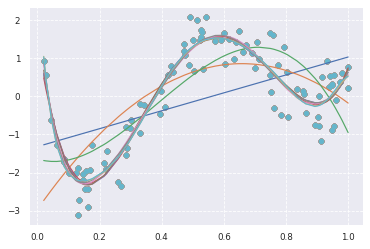

In [32]:
#PolynomialFeatures(degree=1)

deg = [1,2,3,4,5,6,7,8,9,10]
for d in deg:
    regr = Pipeline([
        ('poly', PolynomialFeatures(degree=d)),
        ('linear', LinearRegression())
    ])
    regr.fit(data, target)
    # make predictions
    p_poly = regr.predict(data)
    # plot regression result
    plt.scatter(data, target, label='data')
    plt.plot(data, p_poly, label='polynomial of degree %d' % (d))

0.8717751343330086


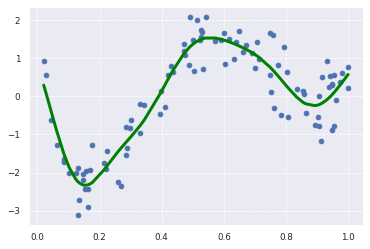

In [33]:
#Lasso

from sklearn.metrics.pairwise import rbf_kernel
from sklearn.linear_model import Lasso

kx = rbf_kernel(X=data, Y=data, gamma=50)   #gammaも一桁多くしておく(基底関数の数)
#KX = rbf_kernel(X, x)

#lasso_clf = LinearRegression()
#lasso_clf = Lasso(alpha=10000, max_iter=1000)  #なんだか・・・・alpha値が大きすぎて正則化が効きすぎ、すべてのパラメータが0に帰着している
lasso_clf = Lasso(alpha=0.001, max_iter=100000) #このくらいが良さげ??iterが1000だと収束しないって警告しているので適当に増やした

lasso_clf.fit(kx, target)

p_lasso = lasso_clf.predict(kx)

plt.scatter(data, target)

#ちょっとOverfit気味かも?最後に交差検証かつグリッドサーチにて追い込みしておく
#plt.plot(data, p, color='green', marker='o', linestyle='-', linewidth=0.1, markersize=3)
plt.plot(data, p_lasso, color='green', linestyle='-', linewidth=3, markersize=3)

print(lasso_clf.score(kx, target))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


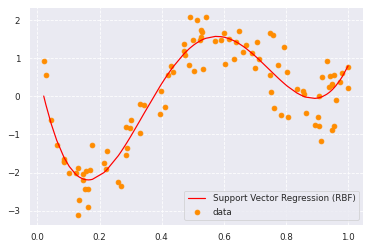

In [34]:
from sklearn import model_selection, preprocessing, linear_model, svm

# SVR-rbf
#clf_svr = svm.SVR(kernel='rbf', C=1e3, gamma=0.1, epsilon=0.1)  #ちょっと性能が低い
clf_svr = svm.SVR(kernel='rbf', C=1e4, gamma=1, epsilon=0.1)   #このくらいで少し改善?Cとgammaを適当にいじった
clf_svr.fit(data, target)
y_rbf = clf_svr.fit(data, target).predict(data)
 
# plot

plt.scatter(data, target, color='darkorange', label='data')
plt.plot(data, y_rbf, color='red', label='Support Vector Regression (RBF)')
plt.legend()
plt.show()

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.1, random_state=0)

以下では，Googleドライブのマイドライブ直下にstudy_ai_mlフォルダを置くことを仮定しています．必要に応じて，パスを変更してください。

In [36]:
from keras.callbacks import EarlyStopping, TensorBoard, ModelCheckpoint

cb_cp = ModelCheckpoint('/content/drive/My Drive/temp/skl_nlr_temp0/.{epoch:02d}-{val_loss:.2f}.hdf5', verbose=1, save_weights_only=True)
cb_tf  = TensorBoard(log_dir='/content/drive/My Drive/temp/skl_nlr_temp1', histogram_freq=0)

In [37]:
def relu_reg_model():
    model = Sequential()
    model.add(Dense(10, input_dim=1, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='linear'))
#     model.add(Dense(100, activation='relu'))
#     model.add(Dense(100, activation='relu'))
#     model.add(Dense(100, activation='relu'))
#     model.add(Dense(100, activation='relu'))
    model.add(Dense(1))

    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [38]:
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, BatchNormalization
from keras.wrappers.scikit_learn import KerasRegressor

# use data split and fit to run the model
estimator = KerasRegressor(build_fn=relu_reg_model, epochs=100, batch_size=5, verbose=1)

history = estimator.fit(x_train, y_train, callbacks=[cb_cp, cb_tf], validation_data=(x_test, y_test))

Epoch 1/100
18/18 [==============================] - 2s 46ms/step - loss: 1.5446 - val_loss: 1.3690

Epoch 00001: saving model to /content/drive/My Drive/temp/skl_nlr_temp0/.01-1.37.hdf5
Epoch 2/100
18/18 [==============================] - 0s 6ms/step - loss: 1.7321 - val_loss: 1.6373

Epoch 00002: saving model to /content/drive/My Drive/temp/skl_nlr_temp0/.02-1.64.hdf5
Epoch 3/100
18/18 [==============================] - 0s 6ms/step - loss: 2.0863 - val_loss: 1.7508

Epoch 00003: saving model to /content/drive/My Drive/temp/skl_nlr_temp0/.03-1.75.hdf5
Epoch 4/100
18/18 [==============================] - 0s 5ms/step - loss: 1.0896 - val_loss: 0.8446

Epoch 00004: saving model to /content/drive/My Drive/temp/skl_nlr_temp0/.04-0.84.hdf5
Epoch 5/100
18/18 [==============================] - 0s 5ms/step - loss: 1.1379 - val_loss: 0.8894

Epoch 00005: saving model to /content/drive/My Drive/temp/skl_nlr_temp0/.05-0.89.hdf5
Epoch 6/100
18/18 [==============================] - 0s 6ms/step - lo

In [39]:
y_pred = estimator.predict(x_train)

18/18 [==============================] - 0s 1ms/step


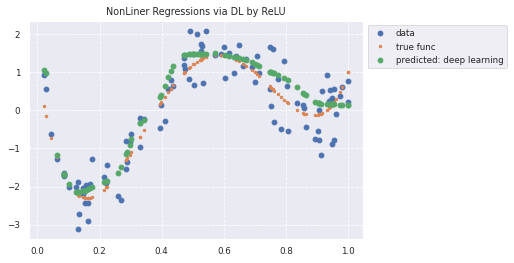

In [40]:
plt.title('NonLiner Regressions via DL by ReLU')
plt.plot(data, target, 'o',label='data')
plt.plot(data, true_func(data), '.',label='true func')
plt.plot(x_train, y_pred, "o", label='predicted: deep learning')
plt.legend(bbox_to_anchor = (1 ,1))

In [41]:
#alphaをいじった後のlasso正則化パラメータ(w)
#何故かここでprintされているが、意図は理解できる
#いじる前は全部0だったけどこのくらいが適当なのか?
#かなりスパース
#Ridgeとも比較しておく
print('----------Lasso----------')
print(lasso_clf.coef_)
print('\n\n----------Ridge----------')
print(clf.coef_)

----------Lasso----------
[ 1.6890831   0.          0.         -0.         -0.         -0.
 -0.         -2.1988523  -2.3271189  -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -1.9911792  -0.         -0.         -0.         -0.         -0.
  0.          0.          0.          0.          0.          0.
  0.02530414  0.33255616  0.          0.          0.          0.
  0.          0.          0.          0.          0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.22388594 -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.20037638 -1.5938762  -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.

gamma=7 alpha=0.0001 clf=0.7996477314895815
gamma=7 alpha=0.00015 clf=0.7984040480085326
gamma=7 alpha=0.0002 clf=0.7974872957549826


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.037059783935546875, tolerance: 0.012963349930942059
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.1258106231689453, tolerance: 0.014145813882350922
  positive)


gamma=8 alpha=0.0001 clf=0.8007397804470477


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.017183303833007812, tolerance: 0.01425356138497591
  positive)


gamma=8 alpha=0.00015 clf=0.8004773273129226


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0319061279296875, tolerance: 0.01425356138497591
  positive)


gamma=8 alpha=0.0002 clf=0.8004456918692003
gamma=9 alpha=0.0001 clf=0.7995515170827929
gamma=9 alpha=0.00015 clf=0.79889928007208
gamma=9 alpha=0.0002 clf=0.7980582021964382
gamma=10 alpha=0.0001 clf=0.7986557433843245
gamma=10 alpha=0.00015 clf=0.7978529876968377
gamma=10 alpha=0.0002 clf=0.7972703316260233
gamma=11 alpha=0.0001 clf=0.798407216911427
gamma=11 alpha=0.00015 clf=0.797249854926687
gamma=11 alpha=0.0002 clf=0.7963854244800821
gamma=12 alpha=0.0001 clf=0.7984759467433248
gamma=12 alpha=0.00015 clf=0.7971626543189594
gamma=12 alpha=0.0002 clf=0.7958409092651015
gamma=13 alpha=0.0001 clf=0.7986818865560728
gamma=13 alpha=0.00015 clf=0.7974794055571532
gamma=13 alpha=0.0002 clf=0.7958996559822751
gamma=14 alpha=0.0001 clf=0.7990938404701016
gamma=14 alpha=0.00015 clf=0.7979910249145878
gamma=14 alpha=0.0002 clf=0.7962343976071781
------------------------------------------------
gamma=8 alpha=0.0001 clf=0.8007397804470477
0.8675846229406591
[ -0.          -0.          -0.    

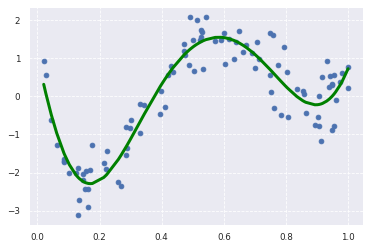

In [42]:
#一応・・・CVかつグリッドサーチなコードを作って性能を追いかけておく
#対象はLasso推定とする
#何度かパラメータいじりつつ追い込み

from sklearn.metrics.pairwise import rbf_kernel
from sklearn.linear_model import Lasso

#gammaとalphaをいじって性能を出してみる
gamma_vals=[7,8,9,10,11,12,13,14]  #表現力上げすぎると過学習気味になるのでこのくらいで
alpha_vals=[0.00010,0.00015,0.0002] #alphaが小さすぎると収束しにくくなるのでこのくらいで
rs_vals=[0,10,20,30,40,50,60,70,80,90]  #random_stateの値は適当に振る(これが1個だとホールドアウト法と同じ)

bestscore = [0,0,0]
max_iter = 1000000

#グリッドサーチの部分
for gval in gamma_vals:
  for aval in alpha_vals:
    nowScore=0
    #CVの部分
    for rsval in rs_vals:
      #trainデータとtestデータの比率は8:2にした(trainとtest)
      #ランダム振り分け(だけど再現性は担保)
      kx = rbf_kernel(X=data, Y=data, gamma=gval)
      d_train, d_test, t_train, t_test = train_test_split(kx, target, random_state=rsval,test_size=0.2)
      lasso_clf = Lasso(alpha=aval, max_iter=max_iter)
      lasso_clf.fit(d_train, t_train)

      #テストデータにて評価
      nowScore += lasso_clf.score(d_test,t_test)
    
    #最良パラメータを保持
    score = nowScore/len(rs_vals)
    print("gamma={} alpha={} clf={}".format(gval,aval,score))
    if bestscore[0] < score:
      bestscore[0] = score
      bestscore[1] = aval
      bestscore[2] = gval

#確定したパラメータにて全データをfitさせて具合を見る
print("------------------------------------------------")
print("gamma={} alpha={} clf={}".format(bestscore[2],bestscore[1],bestscore[0]))
kx = rbf_kernel(X=data, Y=data, gamma=bestscore[2])
lasso_clf = Lasso(alpha=bestscore[1], max_iter=max_iter)
lasso_clf.fit(kx, target)
score = lasso_clf.score(kx, target)
print(score)
p_lasso = lasso_clf.predict(kx)
plt.scatter(data, target)
plt.plot(data, p_lasso, color='green', linestyle='-', linewidth=3, markersize=3)

print(lasso_clf.coef_)

gamma=6 alpha=0.0004 clf=0.8037150111170289
gamma=6 alpha=0.0006 clf=0.8028982184241091
gamma=6 alpha=0.0008 clf=0.8029790195973581
gamma=6 alpha=0.002 clf=0.8003492715245455
gamma=6 alpha=0.004 clf=0.7970712970205838
gamma=6 alpha=0.006 clf=0.794913031986433
gamma=7 alpha=0.0004 clf=0.8005982132517195
gamma=7 alpha=0.0006 clf=0.8021192938928191
gamma=7 alpha=0.0008 clf=0.8023354719359818
gamma=7 alpha=0.002 clf=0.8015027359007114
gamma=7 alpha=0.004 clf=0.8004339012402962
gamma=7 alpha=0.006 clf=0.7987326419773393
gamma=8 alpha=0.0004 clf=0.8023236538820548
gamma=8 alpha=0.0006 clf=0.8012608037676309
gamma=8 alpha=0.0008 clf=0.8012448256203705
gamma=8 alpha=0.002 clf=0.800665178803485
gamma=8 alpha=0.004 clf=0.800468733007788
gamma=8 alpha=0.006 clf=0.8000683159854841
gamma=9 alpha=0.0004 clf=0.8003982622829305
gamma=9 alpha=0.0006 clf=0.8004992878364362
gamma=9 alpha=0.0008 clf=0.800130379421175
gamma=9 alpha=0.002 clf=0.7994524793012439
gamma=9 alpha=0.004 clf=0.7995431695140642
gam

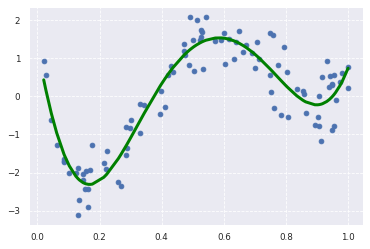

In [43]:
#一応・・・CVかつグリッドサーチなコードを作って性能を追いかけておく
#対象はRidge推定とする
#何度かパラメータいじりつつ追い込み

from sklearn.metrics.pairwise import rbf_kernel
from sklearn.linear_model import Ridge

#gammaとalphaをいじって性能を出してみる
gamma_vals=[6,7,8,9,10,11,12,13,14]  #表現力上げすぎると過学習気味になるのでこのくらいで
alpha_vals=[0.0004,0.0006,0.0008,0.002,0.004,0.006] #alphaが小さすぎると収束しにくくなるのでこのくらいで
rs_vals=[0,10,20,30,40,50,60,70,80,90]  #random_stateの値は適当に振る(これが1個だとホールドアウト法と同じ)
bestscore = [0,0,0]

#グリッドサーチの部分
for gval in gamma_vals:
  for aval in alpha_vals:
    nowScore=0
    #CVの部分
    for rsval in rs_vals:
      #trainデータとtestデータの比率は8:2にした(trainとtest)
      #ランダム振り分け(だけど再現性は担保)
      kx = rbf_kernel(X=data, Y=data, gamma=gval)
      d_train, d_test, t_train, t_test = train_test_split(kx, target, random_state=rsval,test_size=0.2)
      ridge_clf = Ridge(alpha=aval)
      ridge_clf.fit(d_train, t_train)

      nowScore += ridge_clf.score(d_test,t_test)
    
    score = nowScore/len(rs_vals)
    print("gamma={} alpha={} clf={}".format(gval,aval,score))
    if bestscore[0] < score:
      bestscore[0] = score
      bestscore[1] = aval
      bestscore[2] = gval

#確定したパラメータにて全データをfitさせて具合を見る
#性能はLassoと大差なし(追い込んだ範疇では)
print("------------------------------------------------")
print("gamma={} alpha={} clf={}".format(bestscore[2],bestscore[1],bestscore[0]))
kx = rbf_kernel(X=data, Y=data, gamma=bestscore[2])
ridge_clf = Ridge(alpha=bestscore[1])
ridge_clf.fit(kx, target)
score = ridge_clf.score(kx, target)
print(score)
p_ridge = ridge_clf.predict(kx)
plt.scatter(data, target)
plt.plot(data, p_ridge, color='green', linestyle='-', linewidth=3, markersize=3)

print(ridge_clf.coef_)